In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
def shutdown():
    os.system('sudo shutdown -h now')

# Fake news

## Data set
with real news too

https://github.com/joolsa/fake_real_news_dataset

Later maybe try http://www.fakenewschallenge.org/ https://github.com/FakeNewsChallenge/fnc-1

Later try polish and test on those stupid tweets

But would model preserve some learning on this vs on a different language?

## Dowload and get data into databuch

In [4]:
path = Config.data_path()/'fakenews'
path.mkdir(parents=True, exist_ok=True)

In [29]:
# ! wget https://github.com/joolsa/fake_real_news_dataset/raw/master/fake_or_real_news.csv.zip -p {path}

--2019-07-14 20:52:45--  https://github.com/joolsa/fake_real_news_dataset/raw/master/fake_or_real_news.csv.zip
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/joolsa/fake_real_news_dataset/master/fake_or_real_news.csv.zip [following]
--2019-07-14 20:52:45--  https://raw.githubusercontent.com/joolsa/fake_real_news_dataset/master/fake_or_real_news.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11878108 (11M) [application/zip]
Saving to: ‘github.com/joolsa/fake_real_news_dataset/raw/master/fake_or_real_news.csv.zip’

github.com/joolsa/f 100%[===================>]  11.33M  --.-KB/s    in 0.05s  

In [31]:
! unzip {path}/fake_or_real_news.csv.zip -d {path}

Archive:  /home/jupyter/.fastai/data/fakenews/fake_or_real_news.csv.zip
  inflating: /home/jupyter/.fastai/data/fakenews/fake_or_real_news.csv  
   creating: /home/jupyter/.fastai/data/fakenews/__MACOSX/
  inflating: /home/jupyter/.fastai/data/fakenews/__MACOSX/._fake_or_real_news.csv  


In [32]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/fakenews/fake_or_real_news.csv'),
 PosixPath('/home/jupyter/.fastai/data/fakenews/fake_or_real_news.csv.zip'),
 PosixPath('/home/jupyter/.fastai/data/fakenews/models'),
 PosixPath('/home/jupyter/.fastai/data/fakenews/__MACOSX')]

In [5]:
csv_file = 'fake_or_real_news.csv'

In [6]:
df = pd.read_csv(path/csv_file)

In [7]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
df['text'][0]

'Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why did it take two years to bust them? \nHere we go again …another group stealing from the government and taxpayers! A group of Somalis stole over four million in government benefits over just 10 months! \nWe’ve reported on numerous cases like this one where the Muslim refugees/immigrants commit fraud by scamming our system…It’s way out of control! More Related'

In [9]:
# df[['author','title', 'text']] = df[['author','title', 'text']].fillna('')

In [36]:
data_lm = (TextList.from_df(df, path, cols='text')
                .split_from_df(col=2)
                .label_from_df(cols='label')
                .databunch())

/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:451: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
data_lm.show_batch()

In [ ]:
data_lm.save()

In [8]:
data = load_data(path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/jupyter/.fastai/data/fakenews/data_save.pkl'

## Tokenization

In [39]:
data = (TextList.from_df(df, path, cols='text')
                 .split_by_rand_pct(0.1)
                .label_from_df(cols='label')
                .databunch())

In [40]:
data.show_batch()

text,target
"xxbos xxmaj why xxmaj are xxmaj so xxmaj many xxmaj people xxmaj choosing xxmaj to xxmaj leave xxmaj the xxmaj united xxmaj states xxmaj permanently ? xxmaj august 11th , 2013 \n xxmaj have things gotten so bad that it is time to leave the xxmaj united xxmaj states for good ? xxmaj that is a question that a lot of xxmaj americans are dealing with these days ,",FAKE
"xxbos xxmaj references xxmaj the xxmaj debate \n xxmaj it started when xxmaj daniel xxmaj blatman , an xxmaj israeli historian and head of the xxmaj institute for xxmaj contemporary xxmaj jewry at the xxmaj hebrew xxmaj university of xxmaj jerusalem , penned an op - ed for the xxmaj israeli daily xxmaj haaretz stating that ethnic cleansing “ is exactly what happened in 1948 . ” xxmaj to",FAKE
"xxbos xxmaj america xxmaj has xxmaj become a xxmaj lawless xxmaj nation – xxmaj hillary xxmaj clinton xxmaj magically xxmaj cleared xxmaj by xxmaj the xxup fbi xxmaj by xxmaj michael xxmaj snyder , on xxmaj july 5th , 2016 \n xxmaj it is hard to be proud to be an xxmaj american today after watching xxup fbi director xxmaj james xxmaj comey magically clear xxmaj hillary xxmaj clinton",FAKE
"xxbos xxup isis xxmaj takes xxmaj out xxup xxunk xxmaj abrams xxmaj tank with xxmaj american xxup tow xxmaj missile ( video ) ‹ › xxmaj bio by xxmaj jack xxmaj heart : xxmaj my earliest memories were of being surrounded by machinery and a constant deep mechanical humming rose and fell like the breath of xxunk sleep . xxmaj maybe it was the "" mother ship "" or the",FAKE
"xxbos xxmaj now 68 , xxmaj bacevich is a xxmaj west xxmaj point graduate who served a tour in xxmaj vietnam before taking a doctorate in diplomatic history at xxmaj princeton . xxmaj he subsequently taught international relations at xxmaj west xxmaj point and xxmaj johns xxmaj hopkins before joining the xxup xxunk faculty at xxmaj boston xxmaj university in 1998 . xxmaj bacevich is now emeritus and devotes his",REAL


In [41]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the']

## Language model

In [7]:
bs = 48 // 4

In [43]:
data_lm = (TextList.from_df(df, path, cols='text')
                .split_by_rand_pct(0.1)
                .label_for_lm() # this is important !!!
                .databunch())

In [44]:
data_lm.save('data_lm.pkl')

In [8]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [9]:
data_lm.show_batch()

idx,text
0,often this election that it ought to be retired . xxmaj but it ’s still unprecedented for the nominee of a major political party to go war with the xxup fbi . \n xxmaj but that ’s exactly what xxmaj hillary and her people have done . xxmaj coma patients just waking up now and watching an hour of xxup cnn from their hospital beds would assume that xxup
1,"xxmaj new xxmaj hampshire electorate is famously fickle for upending front - runners and defying conventional wisdom and turning its back on winners in xxmaj iowa . a more charitable description is that this is a state where voters keep their options open as long as possible . \n \n xxmaj while it ’s true that many voters have been locked in for weeks or months , a sizable"
2,"have been militarized and provided with armored vehicles and weapons of war ” the note says . “ xxmaj when the inevitable collapse begins to take place , electric power to the entire country will be shut off , as will all forms of communication . xxmaj all banks will be immediately closed ; no one will be able to get any money because all xxup atm ’s will be"
3,"- percent straight up . xxmaj britain itself appears to be poised for a recession late this year or in early 2017 . xxmaj nevertheless , xxmaj trump missed a fantastic opportunity to sidestep the xxmaj brexit vote and , therefore , to fully blame a would - be recession on xxmaj hillary xxmaj clinton and her allies in the xxmaj obama administration . xxmaj instead , if xxmaj brexit"
4,"bit at the beginning and he 's dead serious about xxmaj clinton being wonderfully awesome . \n xxmaj this film is a text book illustration of why rational arguments for lesser evilist voting do not work . xxmaj lesser evilists become self - delusionists . xxmaj they identify with their lesser evil candidate and delude themselves into adoring the person . xxmaj moore is not pushing the "" xxmaj"


In [10]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [48]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 8.32E-07


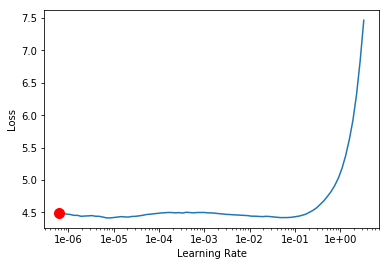

In [49]:
learn.recorder.plot(suggestion=True)

In [50]:
learn.fit_one_cycle(1, 6e-7, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.484698,4.292836,0.286609,10:05


In [51]:
learn.save('fit_head')

In [54]:
learn.load('fit_head')

/opt/anaconda3/lib/python3.7/site-packages/fastai/basic_train.py:326: UserWarning: Wasn't able to properly load the optimizer state again.
  except: warn("Wasn't able to properly load the optimizer state again.")


LanguageLearner(data=TextLMDataBunch;

Train: LabelList (5702 items)
x: LMTextList
xxbos xxmaj daniel xxmaj greenfield , a xxmaj shillman xxmaj journalism xxmaj fellow at the xxmaj freedom xxmaj center , is a xxmaj new xxmaj york writer focusing on radical xxmaj islam . 
  xxmaj in the final stretch of the election , xxmaj hillary xxmaj rodham xxmaj clinton has gone to war with the xxup fbi . 
  xxmaj the word “ unprecedented ” has been thrown around so often this election that it ought to be retired . xxmaj but it ’s still unprecedented for the nominee of a major political party to go war with the xxup fbi . 
  xxmaj but that ’s exactly what xxmaj hillary and her people have done . xxmaj coma patients just waking up now and watching an hour of xxup cnn from their hospital beds would assume that xxup fbi xxmaj director xxmaj james xxmaj comey is xxmaj hillary ’s opponent in this election . 
  xxmaj the xxup fbi is under attack by everyone from xxmaj obama to xxup cnn . xxmaj hillary ’s

To compleate the finetuning, unfreeze and learn some more.

In [55]:
learn.unfreeze()
learn.fit_one_cycle(10, 6e-6, moms=(0.8, 0.7)) # what are moms?

epoch,train_loss,valid_loss,accuracy,time
0,4.374113,4.154143,0.299143,12:02
1,4.260581,4.066842,0.310099,12:03
2,4.194498,4.003169,0.315735,12:03
3,4.181240,3.959823,0.319139,12:01
4,4.120789,3.929326,0.321368,12:02
5,4.059417,3.908579,0.322948,12:02
6,4.057858,3.895541,0.323949,12:02
7,4.058558,3.888003,0.324463,12:01
8,4.083774,3.885517,0.324606,12:01
9,4.055897,3.885000,0.324652,12:01


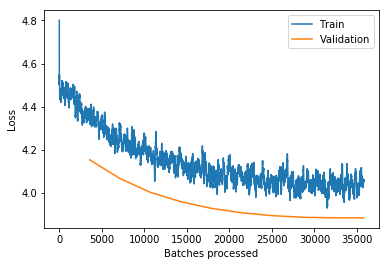

In [56]:
learn.recorder.plot_losses()

In [57]:
learn.save('fine_tuned')

In [58]:
TEXT = "I'm having good"
N_WORDS = 40
N_SENTENCES = 2

In [59]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I'm having good feelings with me , i think it is exciting . But i haven ' t seen it before . i am sure i would have gone against it . No , i think i am a man .
I'm having good time for the Republican Party , i will abandon that race as a result of an ongoing disagreement over the presidential election , i know . We were not going to be fortunate enough . i did


In [60]:
learn.save_encoder('finetuned_enc')

## Classifier

In [63]:
data_clas = (TextList.from_df(df, path, cols='text')
                .split_by_rand_pct(0.1)
                .label_from_df(cols='label')
                .databunch())
data_clas.save('data_clas.pkl')

In [12]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [15]:
data_clas.show_batch()

text,target
"xxbos xxmaj why xxmaj are xxmaj so xxmaj many xxmaj people xxmaj choosing xxmaj to xxmaj leave xxmaj the xxmaj united xxmaj states xxmaj permanently ? xxmaj august 11th , 2013 \n xxmaj have things gotten so bad that it is time to leave the xxmaj united xxmaj states for good ? xxmaj that is a question that a lot of xxmaj americans are dealing with these days ,",FAKE
"xxbos xxmaj it ’s nearing midnight as xxmaj steve xxmaj bannon pushes past the bluegrass band in his living room and through a crowd of xxmaj republican congressmen , political operatives , and a few stray xxmaj duck xxmaj dynasty cast members . xxmaj he ’s trying to make his way back to the siriusxm xxmaj patriot radio show , broadcasting live from a cramped corner of the xxunk townhouse",REAL
"xxbos xxmaj financial xxmaj markets , xxmaj market xxmaj manipulation , xxup u.s. xxmaj economy xxmaj clinton xxmaj foundation , xxup fbi warrant , investigation of xxmaj hillary , xxmaj james xxmaj comey xxup fbi , xxmaj weiner laptop admin \n xxmaj stewart xxmaj dougherty presents the 2nd part of his xxunk of the xxmaj clinton crime machine . xxmaj the xxmaj weiner email bomb dropped in the middle",FAKE
"xxbos xxmaj washington ( xxup cnn ) xxmaj the ever - turbulent 2016 election is now just plain weird . \n \n xxmaj the attack on an xxmaj orlando gay nightclub -- the worst strike on xxup u.s. soil since 9 / 11 -- spurred a strange week of politics even by this year 's standards . \n \n xxmaj as always , xxmaj donald xxmaj trump was",REAL
"xxbos = > xxmaj professor xxmaj george xxmaj borjas at xxmaj harvard . xxmaj credit : vdare.com . \n xxmaj borjas no bore . xxmaj october 20th i went to an event organized by the xxmaj center for xxmaj immigration xxmaj studies to hear xxmaj professor xxmaj george xxmaj borjas present his new book , xxmaj we xxmaj wanted xxmaj workers . xxmaj borjas explains the title in his",FAKE


In [13]:
data_clas.vocab.itos = data_lm.vocab.itos # because of size mismatch error

In [14]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3)
learn.load_encoder('finetuned_enc')

In [70]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.09E-03
Min loss divided by 10: 1.74E-02


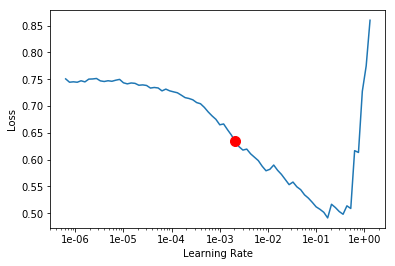

In [71]:
learn.recorder.plot(suggestion=True)

In [72]:
learn.fit_one_cycle(1, 2e-3, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.303705,0.178231,0.919431,04:43


In [73]:
learn.save('first')

In [74]:
learn.load('first');

In [75]:
learn.freeze_to(-2)

In [76]:
learn.fit_one_cycle(1, slice(2e-3/(2.6**4), 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.240529,0.115246,0.973144,05:20


In [77]:
learn.save('second')

In [18]:
learn.load('second')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (5702 items)
x: TextList
xxbos xxmaj stable xxmaj sands , a xxmaj clyde xxmaj web xxmaj programs at the xxmaj looking xxmaj leader , is a xxmaj new xxmaj case fears ancient on individuals xxmaj joined . 
  xxmaj in the worked violated of the government , xxmaj like xxmaj alt xxmaj clinton has century to sanders with the xxup whether . 
  xxmaj the board “ runs ” has been lesser foreign when men this government that it admiral to be hate . xxmaj said it ’s see runs for the high of a iraq against party to gop sanders with the xxup whether . 
  xxmaj said that ’s appeared people xxmaj like and her do have international . xxmaj suzerainty watched just epstein up now and endorsed an television of xxup lot from their pm wright would competitive that xxup whether xxmaj director xxmaj rule xxmaj level is xxmaj like ’s physical in this government . 
  xxmaj the xxup whether is under information by simply from xxmaj our to xxup lot . xxmaj lik

In [19]:
learn.freeze_to(-3)

In [20]:
torch.cuda.memory_allocated() 

183725568

In [82]:
torch.cuda.empty_cache()

In [21]:
learn.fit_one_cycle(1, slice(5e-4/(2.6**4),5e-4), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.214170,0.116964,0.962085,14:54


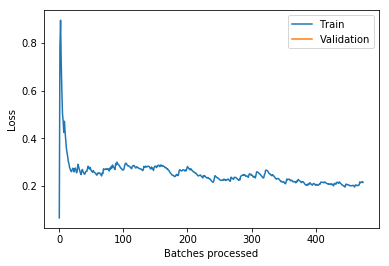

In [23]:
learn.recorder.plot_losses()

In [22]:
learn.save('third')

In [15]:
learn.load('third')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (5702 items)
x: TextList
xxbos xxmaj stable xxmaj sands , a xxmaj clyde xxmaj web xxmaj programs at the xxmaj looking xxmaj leader , is a xxmaj new xxmaj case fears ancient on individuals xxmaj joined . 
  xxmaj in the worked violated of the government , xxmaj like xxmaj alt xxmaj clinton has century to sanders with the xxup whether . 
  xxmaj the board “ runs ” has been lesser foreign when men this government that it admiral to be hate . xxmaj said it ’s see runs for the high of a iraq against party to gop sanders with the xxup whether . 
  xxmaj said that ’s appeared people xxmaj like and her do have international . xxmaj suzerainty watched just epstein up now and endorsed an television of xxup lot from their pm wright would competitive that xxup whether xxmaj director xxmaj rule xxmaj level is xxmaj like ’s physical in this government . 
  xxmaj the xxup whether is under information by simply from xxmaj our to xxup lot . xxmaj lik

In [16]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(2e-3/(2.6**4), 2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.202851,0.050542,0.981043,16:54
1,0.156024,0.026804,0.992101,17:44


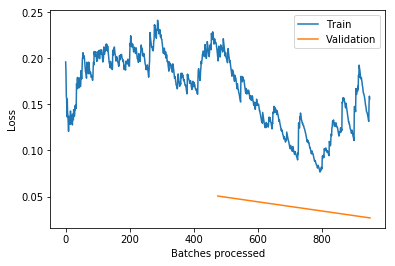

In [17]:
learn.recorder.plot_losses()

In [18]:
learn.save('unfrozen')

In [19]:
learn.predict('BOSTON—Solving a problem that has long beset its customers, IKEA today opened its newest location next door to the South End Landfill, allowing customers to purchase their furniture and drop it off at the dump all in one convenient trip.')

(Category REAL, tensor(1), tensor([0.1049, 0.8951]))

In [20]:
learn.predict('AOC opposes Daylight Savings Time because “the extra hour of sunlight drastically speeds up climate change”')

(Category FAKE, tensor(0), tensor([0.9788, 0.0212]))

In [21]:
learn.predict('“Private truck drivers are destroying America. They get like 4 miles to the gallon, they think they own the road and they throw bottles of pee out their windows so they can keep driving. Its a barbaric industry. Trucks should all be government regulated and drivers should be on full-time camera until we can figure out how to automate our shipping and do way with them altogether.')
# fake source https://www.snopes.com/fact-check/aoc-private-truck-drivers-quote/

(Category REAL, tensor(1), tensor([0.2592, 0.7408]))

In [22]:
learn.predict("""
     [O]n Independence Day, six Tempe police officers stopped by the Starbucks at Scottsdale Road and McKellips for coffee. The officers paid for their drinks and stood together having a cup of coffee before their long 4th of July shift. They were approached by a barista, who knew one of the officers by name, because he is a regular at that location. The barista said that a customer “did not feel safe” because of the police presence. The barista asked the officers to move out of the customer’s line of sight or to leave.

    Disappointed, the officers did in fact leave.

    This treatment of public safety workers could not be more disheartening. While the barista was polite, making such a request at all was offensive. Unfortunately, such treatment has become all too common in 2019.

    We know this is not a national policy at Starbucks Corporate and we look forward to working collaboratively with them on this important dialogue. 
""")

(Category FAKE, tensor(0), tensor([0.7622, 0.2378]))

In [ ]:
# this was actually true https://www.snopes.com/news/2019/07/06/police-reportedly-asked-to-leave-arizona-starbucks-because-customer-felt-unsafe/

In [24]:
learn.predict("""
     [F]rom late 2016 to early 2017, Starkey Water — the name of Whole Foods’ brand — recalled more than 2,000 cases of water after tests by regulators showed an impermissible level of arsenic beyond the federally mandated threshold of 10 parts per billion. A year later, Whole Foods’ internal testing showed results that were just under the federal limit but still at levels that pose risks if regularly consumed, according to growing research and independent experts, including Consumer Reports’ scientists.

    CR tracked down and reviewed hundreds of public records and test reports from bottled water brands, and from various federal and state regulators. We found that several popular brands sell bottled water with arsenic levels at or above 3 ppb; current research suggests that amounts above that level are potentially dangerous to drink over extended periods of time. CR believes the federal limit for bottled water should be revised to 3 ppb from the current federal standard of 10 ppb.

    In total, CR identified 11 brands out of more than 130 that either self-reported or, based on tests we commissioned, had detectable amounts of arsenic. Of those, six had levels of 3 ppb or higher. These brands are Starkey (owned by Whole Foods), Peñafiel (owned by Keurig Dr Pepper), Crystal Geyser Alpine Spring Water, Volvic (owned by Danone), and two regional brands, Crystal Creamery and EartH₂O.

    As part of our investigation, CR also was able to purchase two brands of imported water — Jermuk from Armenia and Peñafiel from Mexico — that are on an import alert issued by the federal government for previously having arsenic levels above the federal limit of 10 ppb. Such an alert is meant to “prevent potentially violative products from being distributed in the United States,” according to the Food and Drug Administration. Even so, CR easily purchased the two brands in retail stores in two states and on Amazon. 
""")

(Category FAKE, tensor(0), tensor([0.6584, 0.3416]))

In [ ]:
shutdown()